In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')

In [2]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import composition as comp
import composition.analysis.plotting as plotting

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
sns.set_palette('Paired', 10)
# sns.set_palette(sns.color_palette('Blues', 10))
sns.set_color_codes()

/home/jbourbeau/cr-composition/composition/load_sim.py:86: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))


IT fraction contained = 0.388607463139
Number of events = 270222
IT fraction contained = 0.481863060743
Number of events = 255230
IT fraction contained = 0.510143791874
Number of events = 249125
IT fraction contained = 0.520076266934
Number of events = 96094
IT fraction contained = 0.998230898911
Number of events = 96087
IT fraction contained = 0.998230770031
Number of events = 96060
IT fraction contained = 0.998230272746
Number of events = 74641
IT fraction contained = 0.999986602537
Number of events = 51607
IT fraction contained = 1.0


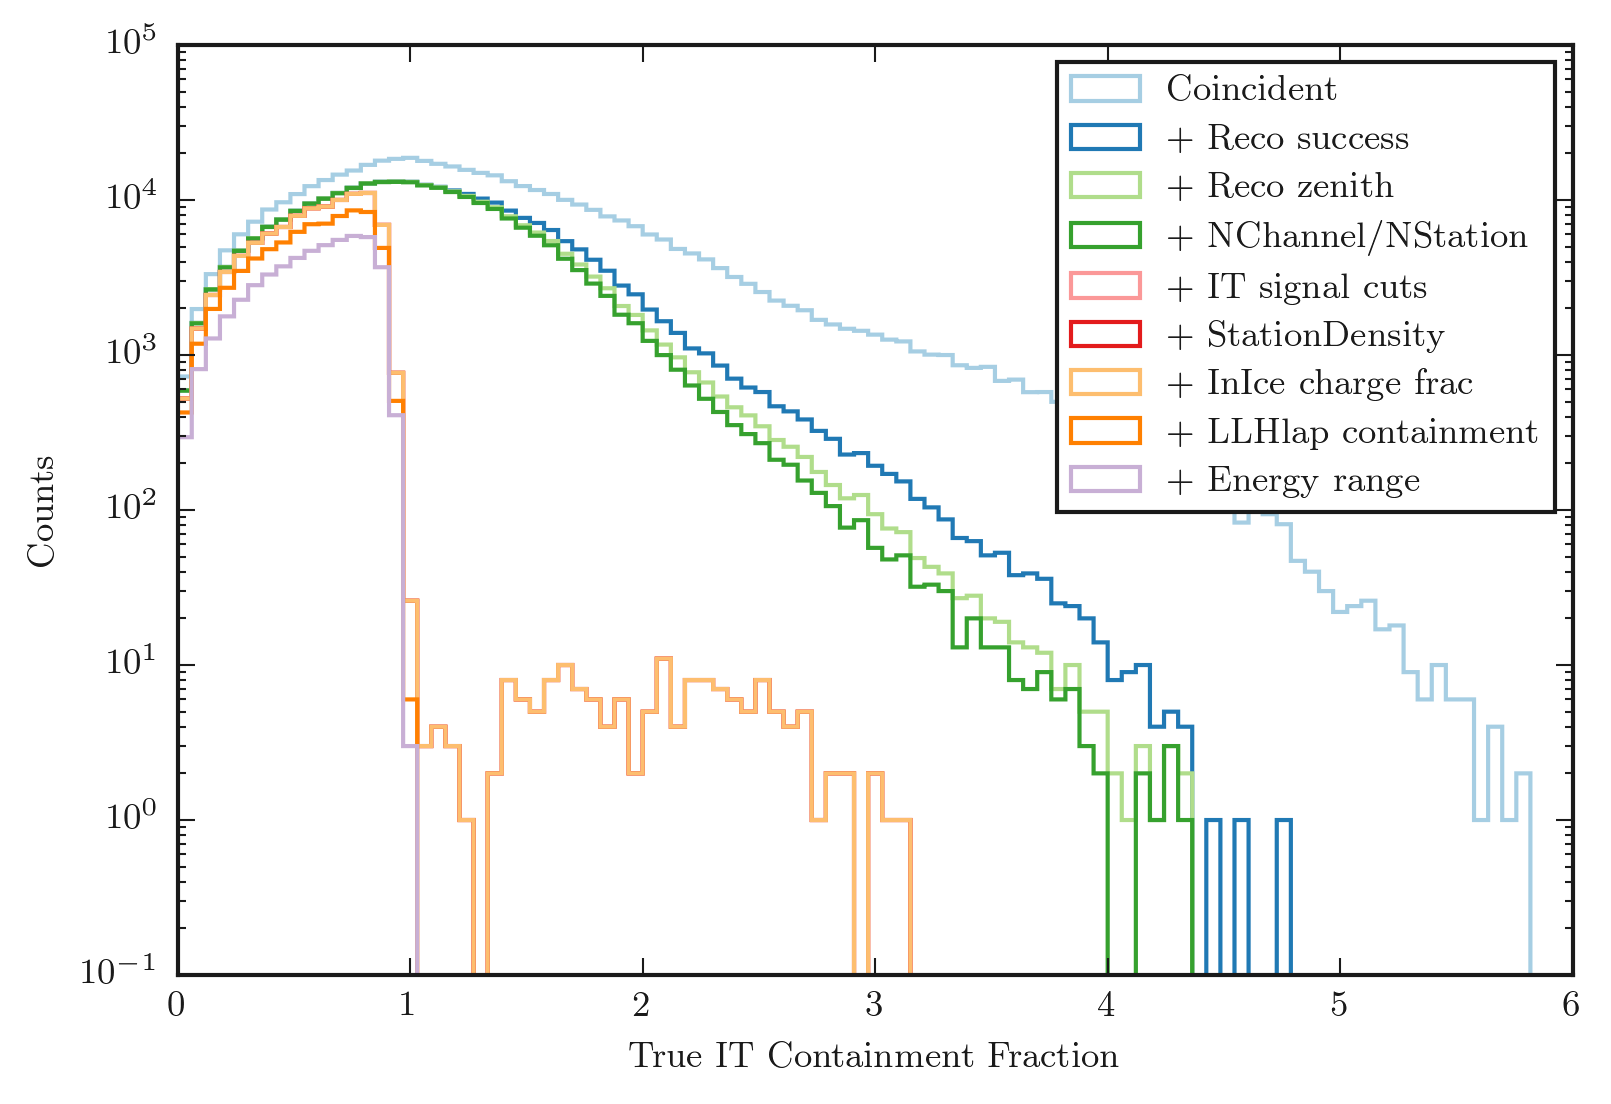

In [4]:
# standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits_1_60', 'IT_signal',
#                      'StationDensity', 'max_charge_frac', 'reco_containment', 'energy_range']
standard_cut_keys = ['LLHlap_reco_exists', 'LLHlap_zenith', 'num_hits_1_60', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_60', 'LLHlap_containment', 'energy_range']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IT signal cuts',
          'StationDensity', 'InIce charge frac', 'LLHlap containment', 'Energy range']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
fig, ax = plt.subplots()
containment_bins = np.linspace(0, 6, 100)
IT_containment = df[selection_mask]['IceTop_FractionContainment']
print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
sns.distplot(IT_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    print('Number of events = {}'.format(len(df_cuts)))
    
    IT_containment = df_cuts['IceTop_FractionContainment']
    print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
    sns.distplot(IT_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
# axarr[0].legend()
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True IT Containment Fraction')
ax.set_ylabel('Counts')

InIce fraction contained = 0.721223273985
Number of events = 270222
InIce fraction contained = 0.723871483447
Number of events = 255230
InIce fraction contained = 0.726376209693
Number of events = 249125
InIce fraction contained = 0.741061716006
Number of events = 96094
InIce fraction contained = 0.77666659729
Number of events = 96087
InIce fraction contained = 0.776660734543
Number of events = 96060
InIce fraction contained = 0.776733291693
Number of events = 74641
InIce fraction contained = 0.973446229284
Number of events = 51607
InIce fraction contained = 0.973743871955


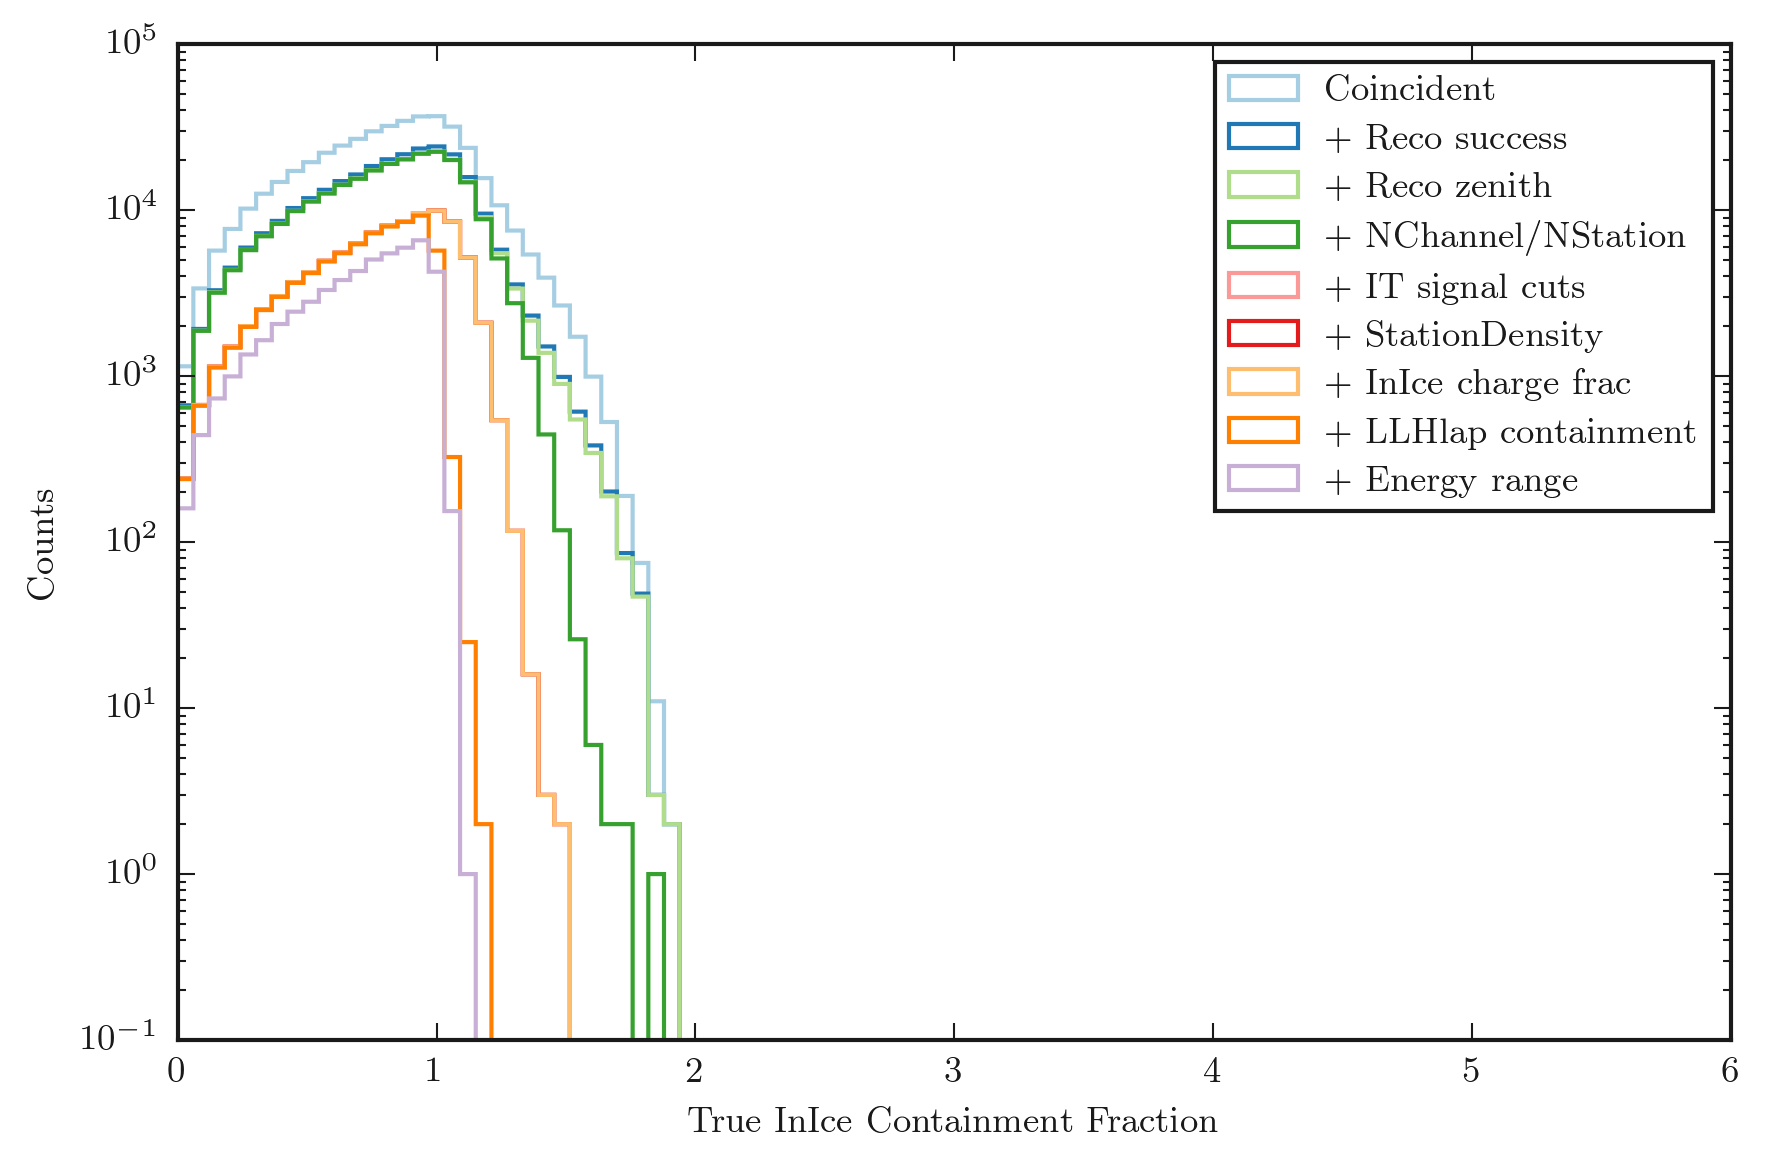

In [5]:
selection_mask = np.array([True]*len(df))
# InIce_containment = df[selection_mask]['LLHlap_InIce_containment']
InIce_containment = df[selection_mask]['InIce_FractionContainment']
print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
fig, ax = plt.subplots()
sns.distplot(InIce_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    print('Number of events = {}'.format(len(df_cuts)))
    
    InIce_containment = df_cuts['InIce_FractionContainment']
    print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
    sns.distplot(InIce_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
    
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True InIce Containment Fraction')
ax.set_ylabel('Counts')
plt.tight_layout()

IT fraction contained = 0.388607463139
Number of events = 339153
IT fraction contained = 0.463451598541
Number of events = 329445
IT fraction contained = 0.476498353291
Number of events = 267291
IT fraction contained = 0.484273694213
Number of events = 96305
IT fraction contained = 0.995638855719
Number of events = 96293
IT fraction contained = 0.995690237089
Number of events = 96266
IT fraction contained = 0.995689028317
Number of events = 68692
IT fraction contained = 0.999970884528
Number of events = 47159
IT fraction contained = 1.0


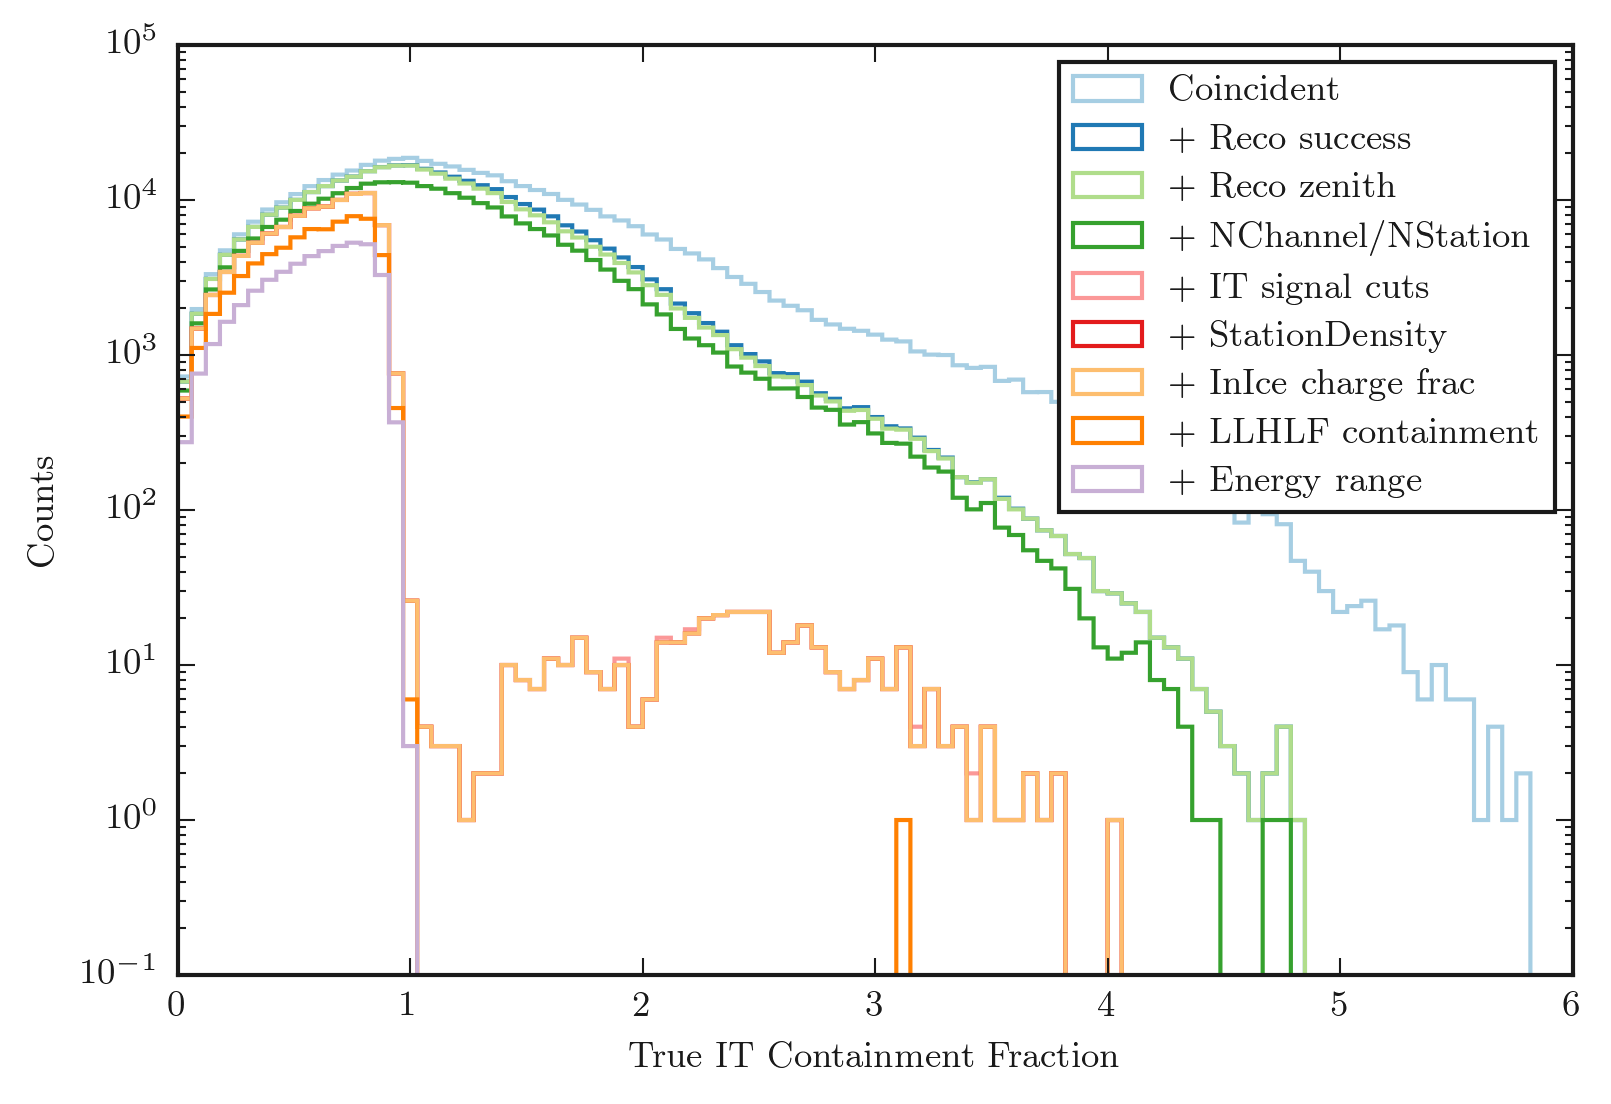

In [6]:
standard_cut_keys = ['LLHLF_reco_exists', 'LLHLF_zenith', 'num_hits_1_60', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_60', 'LLHLF_containment', 'energy_range']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IT signal cuts',
          'StationDensity', 'InIce charge frac', 'LLHLF containment', 'Energy range']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
fig, ax = plt.subplots()
containment_bins = np.linspace(0, 6, 100)
IT_containment = df[selection_mask]['IceTop_FractionContainment']
print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
sns.distplot(IT_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    print('Number of events = {}'.format(len(df_cuts)))
    
    IT_containment = df_cuts['IceTop_FractionContainment']
    print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
    sns.distplot(IT_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
# axarr[0].legend()
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True IT Containment Fraction')
ax.set_ylabel('Counts')

InIce fraction contained = 0.721223273985
Number of events = 339153
InIce fraction contained = 0.755275642557
Number of events = 329445
InIce fraction contained = 0.760621651566
Number of events = 267291
InIce fraction contained = 0.742400604585
Number of events = 96305
InIce fraction contained = 0.77671979648
Number of events = 96293
InIce fraction contained = 0.776712741321
Number of events = 96266
InIce fraction contained = 0.776785157792
Number of events = 68692
InIce fraction contained = 0.98663599837
Number of events = 47159
InIce fraction contained = 0.987425517929


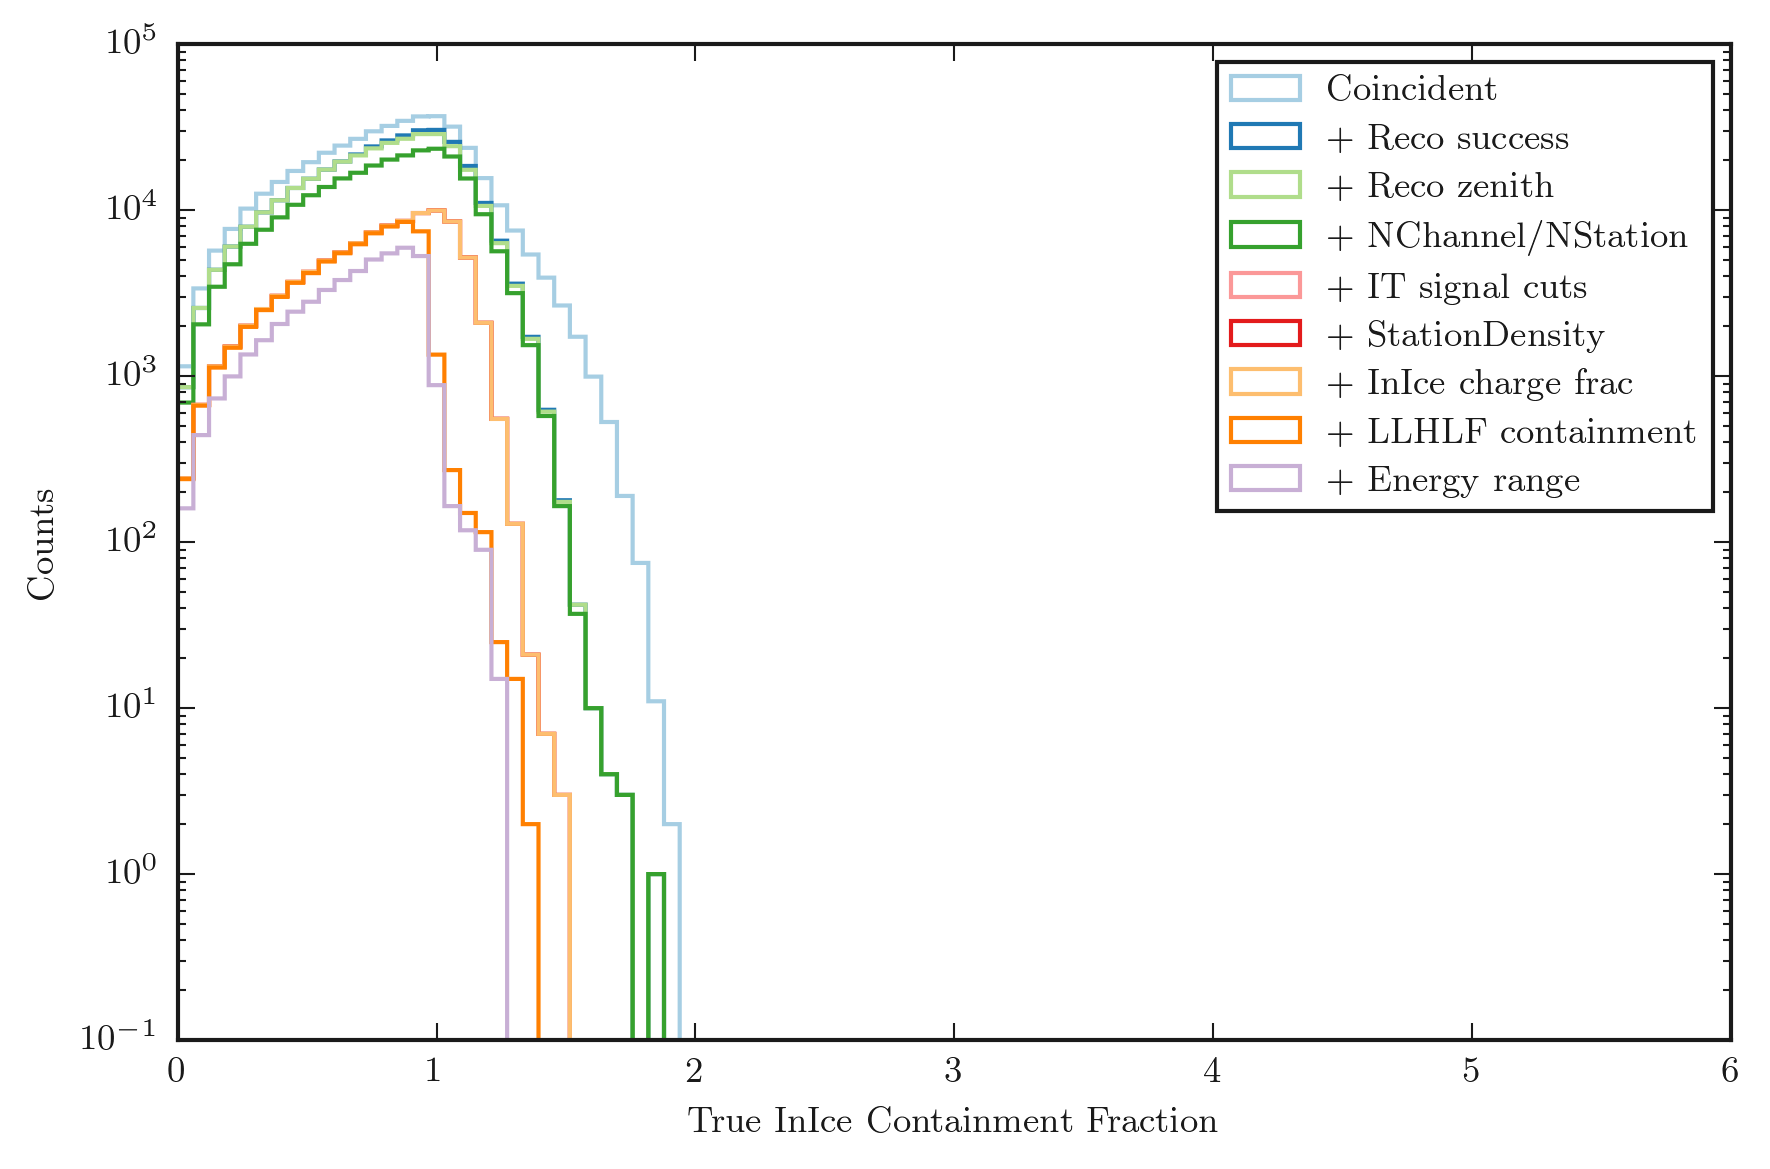

In [7]:
selection_mask = np.array([True]*len(df))
# InIce_containment = df[selection_mask]['LLHLF_InIce_containment']
InIce_containment = df[selection_mask]['InIce_FractionContainment']
print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
fig, ax = plt.subplots()
sns.distplot(InIce_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    print('Number of events = {}'.format(len(df_cuts)))
    
    InIce_containment = df_cuts['InIce_FractionContainment']
    print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
    sns.distplot(InIce_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
    
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True InIce Containment Fraction')
ax.set_ylabel('Counts')
plt.tight_layout()

In [8]:
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
                     'StationDensity', 'max_charge_frac', 'reco_containment', 'min_energy']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]
print('number of events = {}'.format(len(df)))

InIce_containment = df['InIce_FractionContainment']
log_energy = df['reco_log_energy']
MC_log_energy = df['MC_log_energy']
charge = df.InIce_log_charge

containment_bins = np.linspace(0, 1, 75)
energy_bins = np.arange(6.2, 9.51, 0.05)
bins = [containment_bins, energy_bins]

fig, ax = plt.subplots()
im = plotting.histogram_2D(InIce_containment, MC_log_energy, bins, log_counts=True, ax=ax)
# ax.set_title(title)
# plt.xlim([6.2, 9.5])
plt.show()

NameError: name 'load_sim' is not defined

In [ ]:
sns.palplot(sns.color_palette("Paired", 10))

In [10]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['LLHlap_reco_exists', 'LLHlap_zenith', 'num_hits_1_60', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_60', 'LLHlap_IT_containment', 'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list, feature_labels = comp.get_training_features()
print('training features = {}'.format(feature_list))
X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(df, feature_list)

print('number training events = ' + str(y_train.shape[0]))

training features = ['reco_log_energy', 'InIce_log_charge_1_30', 'LLHLF_cos_zenith', 'lap_chi2', 'NChannels_1_30', 'log_s125']
number training events = 47054


In [11]:
sns.set_palette('muted')
sns.set_color_codes()

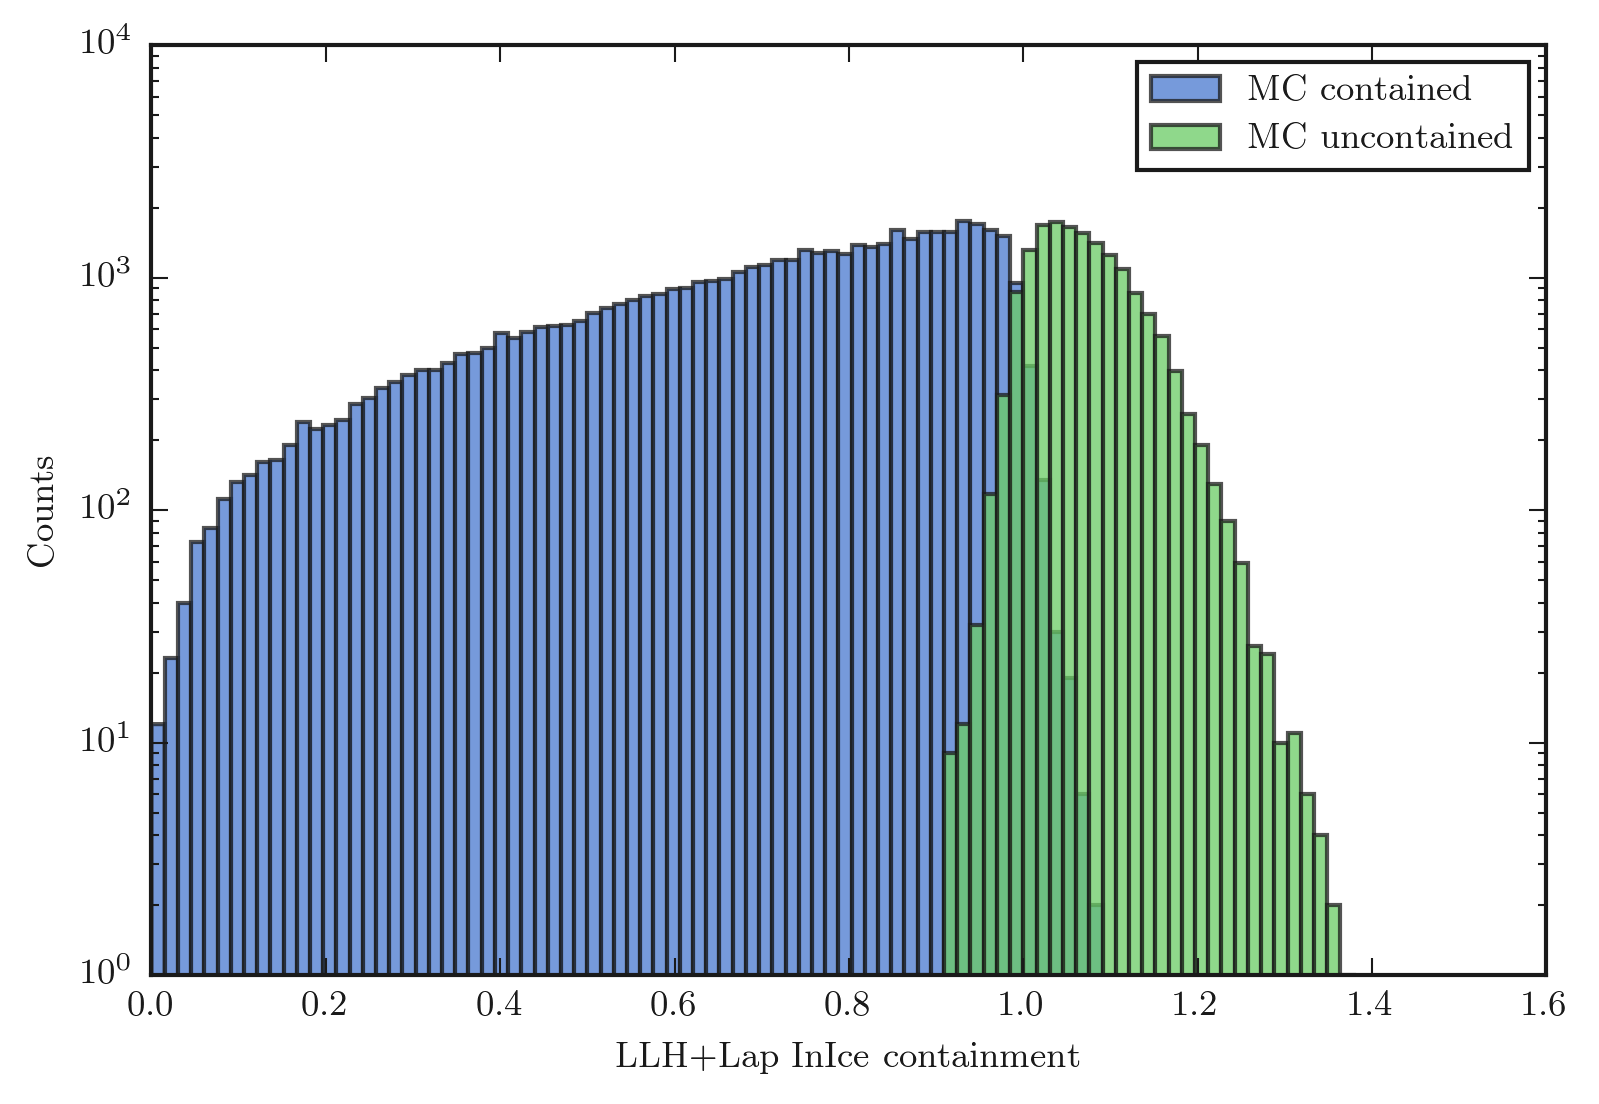

In [12]:
MC_contained = (df.InIce_FractionContainment <= 1.0)
MC_uncontained = (df.InIce_FractionContainment > 1.0)
df.LLHlap_InIce_containment[MC_contained].plot(kind='hist', bins=np.linspace(0, 1.5, 100),
                                               label='MC contained', logy=True, alpha=0.75)
df.LLHlap_InIce_containment[MC_uncontained].plot(kind='hist', bins=np.linspace(0, 1.5, 100),
                                                 label='MC uncontained', logy=True, alpha=0.75)
plt.xlabel('LLH+Lap InIce containment')
plt.ylabel('Counts')
plt.legend()

In [7]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['LLHLF_reco_exists', 'LLHLF_zenith', 'num_hits_1_60', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_60', 'LLHLF_IT_containment', 'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list, feature_labels = comp.get_training_features()
print('training features = {}'.format(feature_list))
X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(df, feature_list)

print('number training events = ' + str(y_train.shape[0]))

training features = ['reco_log_energy', 'InIce_log_charge_1_30', 'LLHLF_cos_zenith', 'lap_chi2', 'NChannels_1_30', 'log_s125']
number training events = 47056


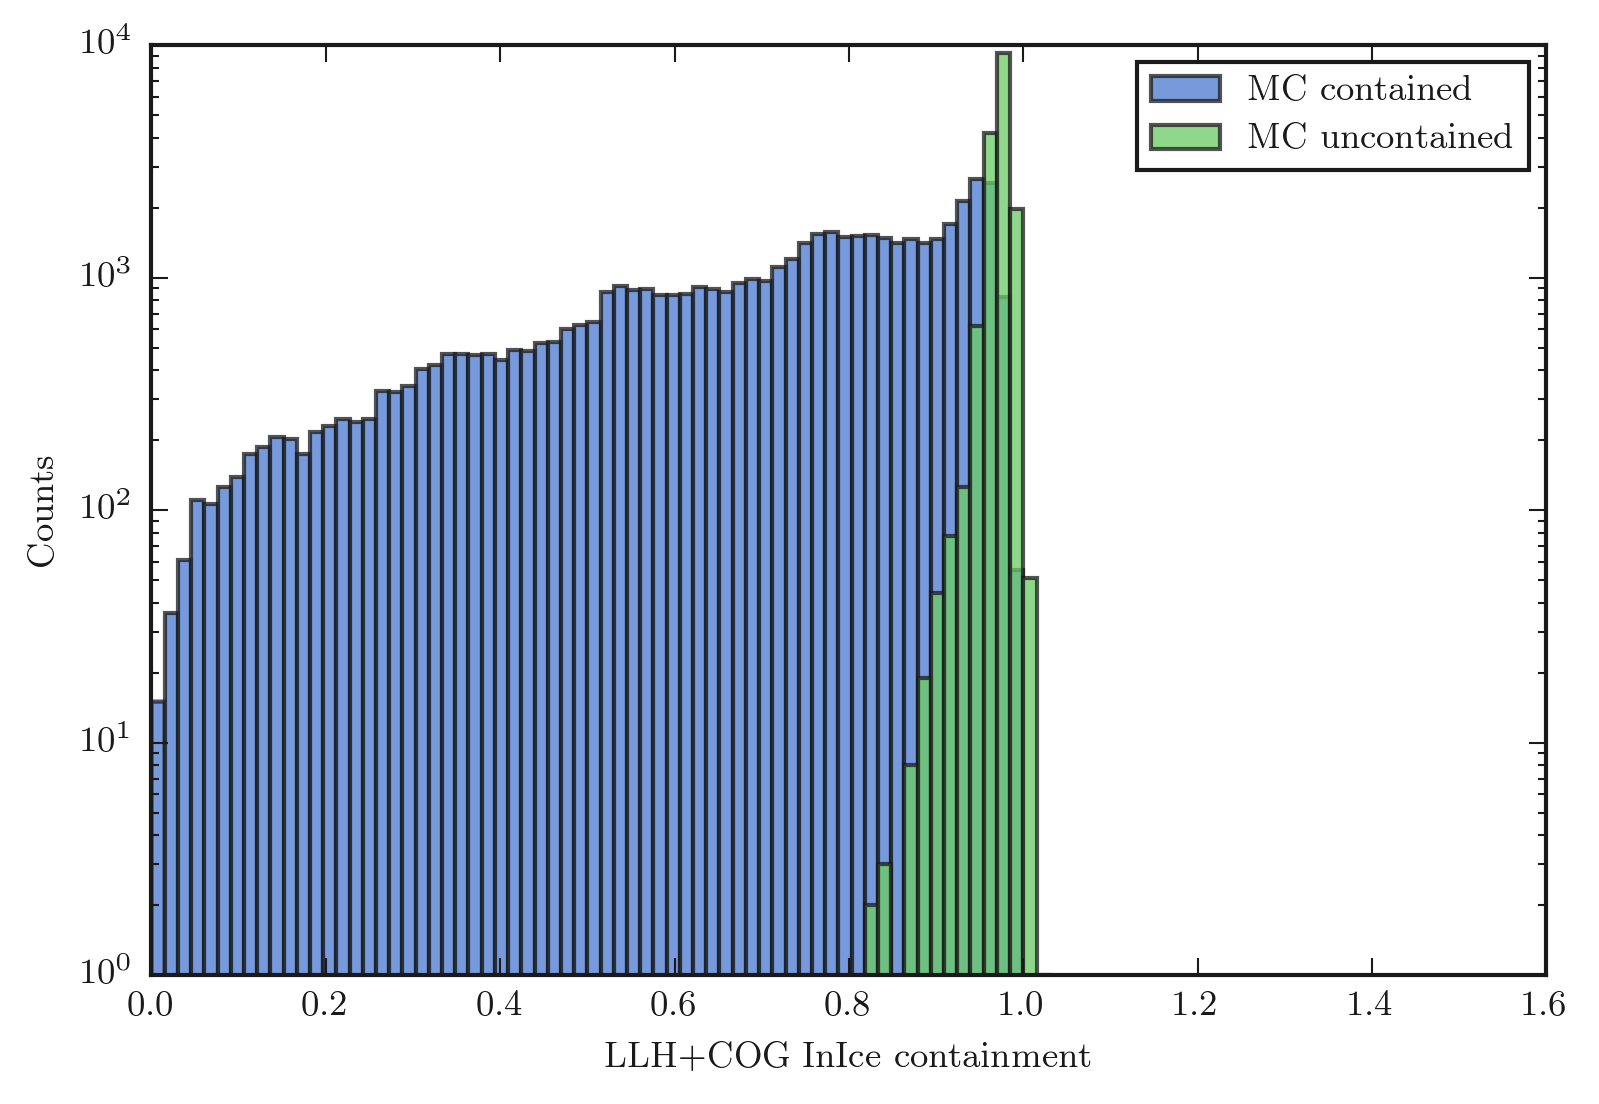

In [9]:
MC_contained = (df.InIce_FractionContainment <= 1.0)
MC_uncontained = (df.InIce_FractionContainment > 1.0)
df.LLHLF_InIce_containment[MC_contained].plot(kind='hist', bins=np.linspace(0, 1.5, 100),
                                              label='MC contained', logy=True, alpha=0.75)
df.LLHLF_InIce_containment[MC_uncontained].plot(kind='hist', bins=np.linspace(0, 1.5, 100),
                                                label='MC uncontained', logy=True, alpha=0.75)
plt.xlabel('LLH+COG InIce containment')
plt.ylabel('Counts')
plt.legend()